In [29]:
import pandas as pd
file_path = "C:/Users/gangl/Documents/Python Scripts/athlete_events.csv"
Athletes = pd.read_csv(file_path)

In [30]:
# Remove Rows that Medal is NA
Athletes = Athletes[Athletes["Medal"].isin(["Gold", "Silver", "Bronze"])]

In [31]:
# Drop the columns of Name, Height, Weight,Team,Sport, and Event
Athletes = Athletes.drop(columns=["Name", "Height", "Weight"])

In [32]:
Athletes.head()

,ID,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,M,28.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [33]:
Athletes = Athletes.drop_duplicates(subset=["ID", "Age"], keep="first")

In [34]:
Athletes.head()

,ID,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
40,16,M,28.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
50,17,M,32.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze


In [39]:
Athletes.to_csv("Athletes.csv", index=False)

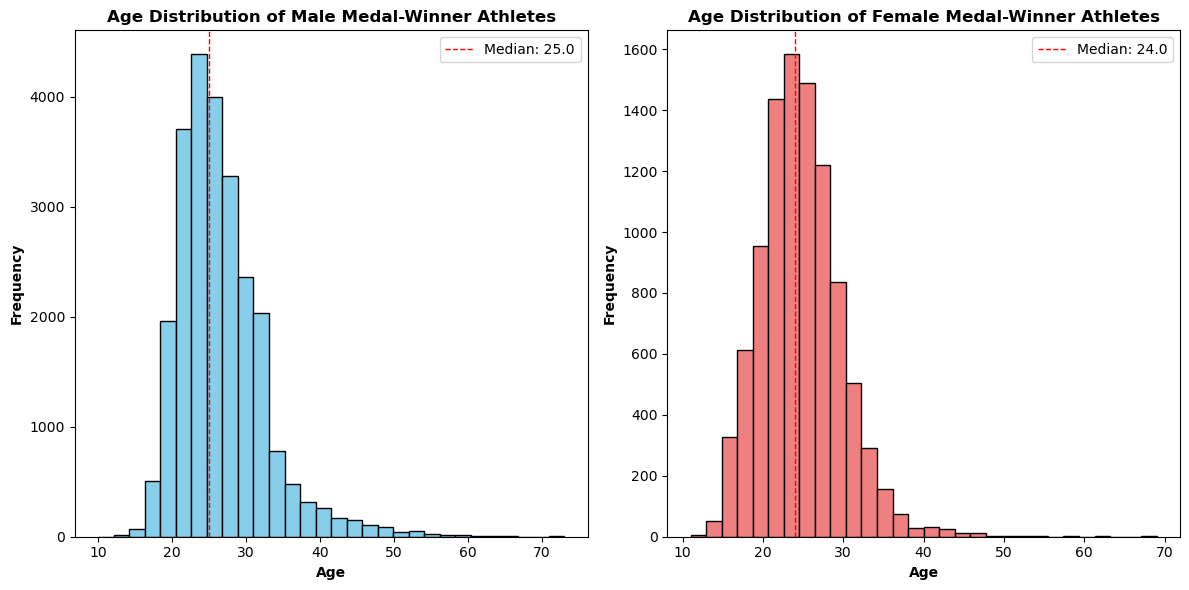

In [44]:
import matplotlib.pyplot as plt

# Separate data for males and females
male_athletes = Athletes[Athletes['Sex'] == 'M']
female_athletes = Athletes[Athletes['Sex'] == 'F']

# Calculate median ages
median_age_male = male_athletes['Age'].median()
median_age_female = female_athletes['Age'].median()

# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Histogram for Male athletes
axes[0].hist(male_athletes['Age'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution of Male Medal-Winner Athletes', fontweight='bold')
axes[0].set_xlabel('Age', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].axvline(median_age_male, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_age_male:.1f}')
axes[0].legend()

# Histogram for Female athletes
axes[1].hist(female_athletes['Age'], bins=30, color='lightcoral', edgecolor='black')
axes[1].set_title('Age Distribution of Female Medal-Winner Athletes', fontweight='bold')
axes[1].set_xlabel('Age', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')
axes[1].axvline(median_age_female, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_age_female:.1f}')
axes[1].legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig('Male_Female_medal_winner_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\gangl\AppData\Local\Temp\ipykernel_89264\1914242138.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20').colors[:len(labels)] # Get enough colors


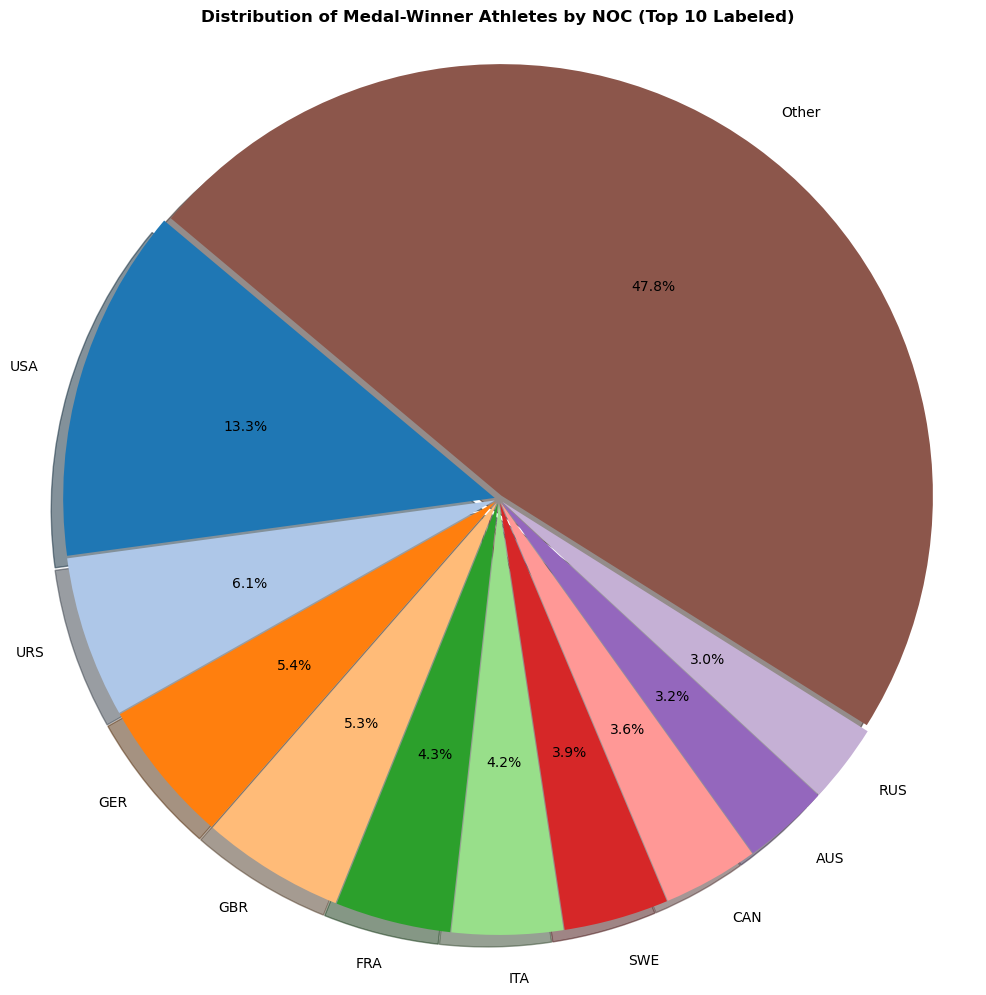

In [47]:
# --- Calculate NOC Counts ---
noc_counts = Athletes['NOC'].value_counts()

# --- Identify the top 2 NOCs ---
top_2_nocs = noc_counts.nlargest(2)
other_count = noc_counts[~noc_counts.index.isin(top_2_nocs.index)].sum()

# --- Identify the top 10 NOCs ---
top_10_nocs = noc_counts.nlargest(10)
other_count = noc_counts[~noc_counts.index.isin(top_10_nocs.index)].sum()

# --- Create data for the pie chart ---
labels = top_10_nocs.index.tolist() + ['Other']
sizes = top_10_nocs.values.tolist() + [other_count]
colors = plt.cm.get_cmap('tab20').colors[:len(labels)] # Get enough colors
explode = [0.01] * len(labels) # Slightly explode all slices for better visibility

# --- Create the pie chart ---
plt.figure(figsize=(10, 10))
plt.pie(sizes,
        labels=labels,
        colors=colors,
        explode=explode,
        autopct='%1.1f%%',  # Display percentage
        shadow=True,
        startangle=140)
plt.title('Distribution of Medal-Winner Athletes by NOC (Top 10 Labeled)', fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('Distribution of Medal-Winner Athletes by NOC (Top 10 Labeled).png', dpi=300, bbox_inches='tight')
plt.show()

In [48]:
file_path_2 = "C:/Users/gangl/Documents/Python Scripts/athlete_events.csv"
athletes_df = pd.read_csv(file_path_2)

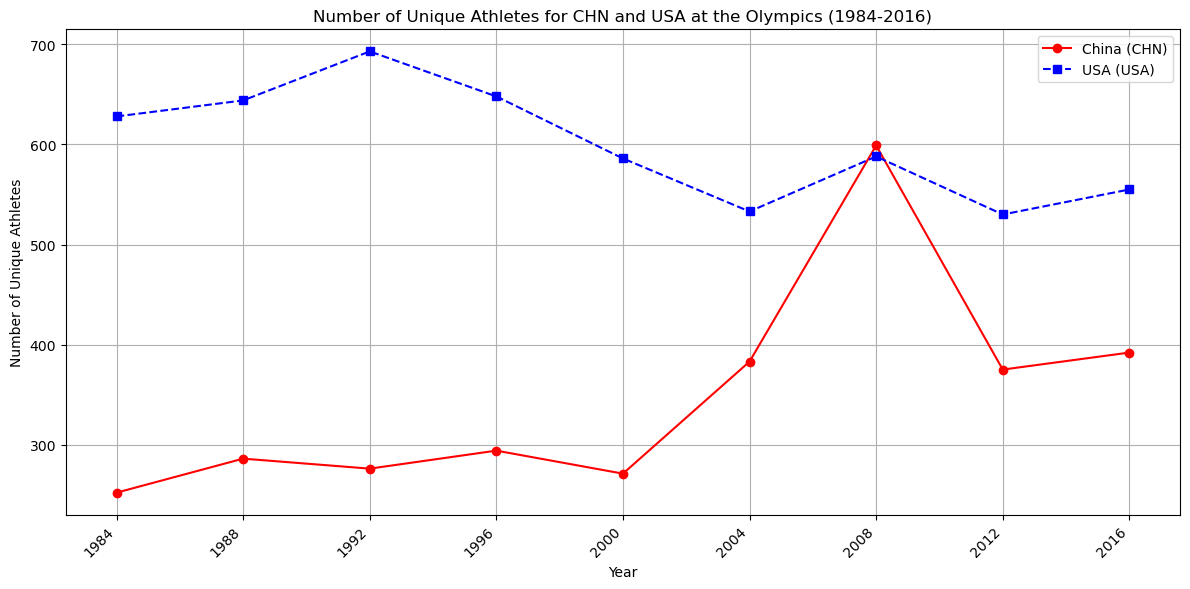

In [50]:
# Define the years of interest
years_of_interest = [1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]

# Filter data for China (CHN) and the specified years
china_athletes = athletes_df[athletes_df['NOC'] == 'CHN']
china_athletes_filtered = china_athletes[china_athletes['Year'].isin(years_of_interest)]
china_unique_athletes = china_athletes_filtered.groupby('Year')['ID'].nunique().reset_index()
china_unique_athletes = china_unique_athletes.rename(columns={'ID': 'Unique_Athletes_CHN'})

# Filter data for USA and the specified years
usa_athletes = athletes_df[athletes_df['NOC'] == 'USA']
usa_athletes_filtered = usa_athletes[usa_athletes['Year'].isin(years_of_interest)]
usa_unique_athletes = usa_athletes_filtered.groupby('Year')['ID'].nunique().reset_index()
usa_unique_athletes = usa_unique_athletes.rename(columns={'ID': 'Unique_Athletes_USA'})

# Merge the unique athlete counts for both countries
merged_athletes = pd.merge(china_unique_athletes, usa_unique_athletes, on='Year', how='outer').fillna(0)

# --- Create the line plot ---
plt.figure(figsize=(12, 6))

plt.plot(merged_athletes['Year'], merged_athletes['Unique_Athletes_CHN'], marker='o', linestyle='-', color='red', label='China (CHN)')
plt.plot(merged_athletes['Year'], merged_athletes['Unique_Athletes_USA'], marker='s', linestyle='--', color='blue', label='USA (USA)')

plt.title('Number of Unique Athletes for CHN and USA at the Olympics (1984-2016)')
plt.xlabel('Year')
plt.ylabel('Number of Unique Athletes')
plt.grid(True)
plt.xticks(years_of_interest, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

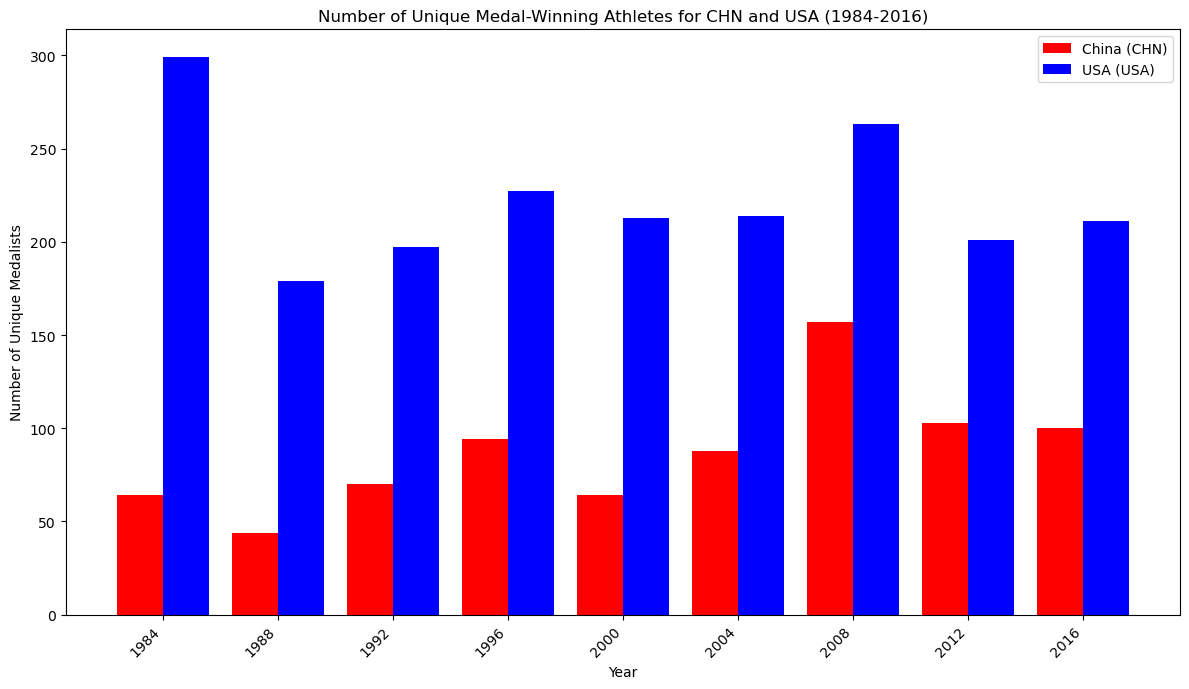

In [52]:
import matplotlib.pyplot as plt
import numpy as np  # For adjusting bar positions

# Define the years of interest
years_of_interest = [1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]

# Remove rows where 'Medal' is 'NA' (assuming 'NA' represents no medal)
athletes_with_medal = athletes_df[athletes_df["Medal"].isin(["Gold", "Silver", "Bronze"])]

# Filter data for China (CHN) and the specified years
china_medalists = athletes_with_medal[athletes_with_medal['NOC'] == 'CHN']
china_medalists_filtered = china_medalists[china_medalists['Year'].isin(years_of_interest)]
china_unique_medalists = china_medalists_filtered.groupby('Year')['ID'].nunique().reset_index()
china_unique_medalists = china_unique_medalists.rename(columns={'ID': 'Unique_Medalists_CHN'})

# Filter data for USA and the specified years
usa_medalists = athletes_with_medal[athletes_with_medal['NOC'] == 'USA']
usa_medalists_filtered = usa_medalists[usa_medalists['Year'].isin(years_of_interest)]
usa_unique_medalists = usa_medalists_filtered.groupby('Year')['ID'].nunique().reset_index()
usa_unique_medalists = usa_unique_medalists.rename(columns={'ID': 'Unique_Medalists_USA'})

# Merge the unique medalist counts for both countries
merged_medalists = pd.merge(china_unique_medalists, usa_unique_medalists, on='Year', how='outer').fillna(0)

# --- Create the bar plot ---
plt.figure(figsize=(12, 7))  # Adjusted figure size for better label display

bar_width = 0.4
x_positions_chn = np.arange(len(years_of_interest))
x_positions_usa = x_positions_chn + bar_width

plt.bar(x_positions_chn, merged_medalists['Unique_Medalists_CHN'], width=bar_width, color='red', label='China (CHN)', align='center')
plt.bar(x_positions_usa, merged_medalists['Unique_Medalists_USA'], width=bar_width, color='blue', label='USA (USA)', align='center')

plt.title('Number of Unique Medal-Winning Athletes for CHN and USA (1984-2016)')
plt.xlabel('Year')
plt.ylabel('Number of Unique Medalists')
plt.xticks(x_positions_chn + bar_width / 2, years_of_interest, rotation=45, ha='right')  # Centered x-ticks
plt.legend()
plt.tight_layout()
plt.show()

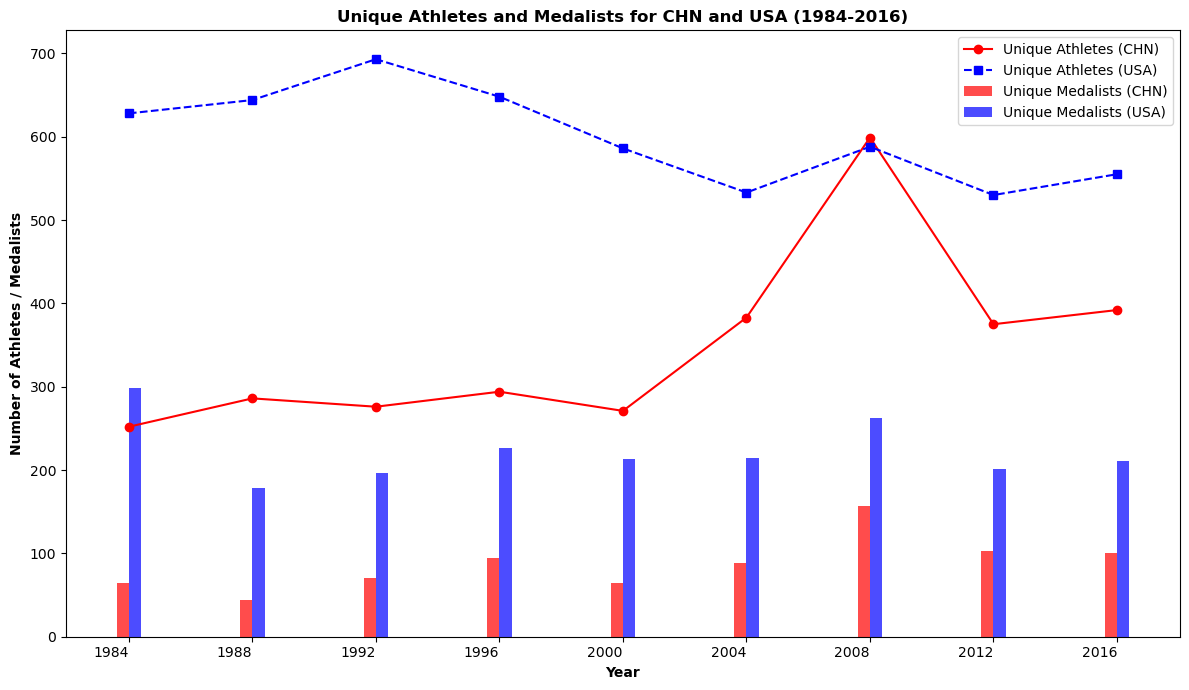

In [68]:
# Define the years of interest
years_of_interest = [1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]

# Filter data for China (CHN) and the specified years
china_athletes = athletes_df[athletes_df['NOC'] == 'CHN']
china_athletes_filtered = china_athletes[china_athletes['Year'].isin(years_of_interest)]
china_unique_athletes_chn = china_athletes_filtered.groupby('Year')['ID'].nunique().reset_index()
china_unique_athletes_chn = china_unique_athletes_chn.rename(columns={'ID': 'Unique_Athletes_CHN'})

# Remove rows where 'Medal' is 'NA' (assuming 'NA' represents no medal)
athletes_with_medal = athletes_df[athletes_df["Medal"].isin(["Gold", "Silver", "Bronze"])]
china_medalists = athletes_with_medal[athletes_with_medal['NOC'] == 'CHN']
china_medalists_filtered = china_medalists[china_medalists['Year'].isin(years_of_interest)]
china_unique_medalists_chn = china_medalists_filtered.groupby('Year')['ID'].nunique().reset_index()
china_unique_medalists_chn = china_unique_medalists_chn.rename(columns={'ID': 'Unique_Medalists_CHN'})

# Filter data for USA and the specified years
usa_athletes = athletes_df[athletes_df['NOC'] == 'USA']
usa_athletes_filtered = usa_athletes[usa_athletes['Year'].isin(years_of_interest)]
usa_unique_athletes_usa = usa_athletes_filtered.groupby('Year')['ID'].nunique().reset_index()
usa_unique_athletes_usa = usa_unique_athletes_usa.rename(columns={'ID': 'Unique_Athletes_USA'})

usa_medalists = athletes_with_medal[athletes_with_medal['NOC'] == 'USA']
usa_medalists_filtered = usa_medalists[usa_medalists['Year'].isin(years_of_interest)]
usa_unique_medalists_usa = usa_medalists_filtered.groupby('Year')['ID'].nunique().reset_index()
usa_unique_medalists_usa = usa_unique_medalists_usa.rename(columns={'ID': 'Unique_Medalists_USA'})

# Merge the dataframes
merged_data = pd.merge(china_unique_athletes_chn, china_unique_medalists_chn, on='Year', how='outer').fillna(0)
merged_data = pd.merge(merged_data, usa_unique_athletes_usa, on='Year', how='outer').fillna(0)
merged_data = pd.merge(merged_data, usa_unique_medalists_usa, on='Year', how='outer').fillna(0)

# --- Create the plot with a single y-axis ---
plt.figure(figsize=(12, 7))

# Plot the number of unique athletes as lines
plt.plot(merged_data['Year'], merged_data['Unique_Athletes_CHN'], marker='o', linestyle='-', color='red', label='Unique Athletes (CHN)')
plt.plot(merged_data['Year'], merged_data['Unique_Athletes_USA'], marker='s', linestyle='--', color='blue', label='Unique Athletes (USA)')

# Plot the number of unique medalists as bars
bar_width = 0.4
x_positions_chn = merged_data['Year'] - bar_width/2
x_positions_usa = merged_data['Year'] + bar_width/2

plt.bar(x_positions_chn, merged_data['Unique_Medalists_CHN'], width=bar_width, color='red', alpha=0.7, label='Unique Medalists (CHN)')
plt.bar(x_positions_usa, merged_data['Unique_Medalists_USA'], width=bar_width, color='blue', alpha=0.7, label='Unique Medalists (USA)')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Athletes / Medalists', fontweight='bold')
plt.title('Unique Athletes and Medalists for CHN and USA (1984-2016)', fontweight='bold')
plt.xticks(years_of_interest, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('CHN VS USA.png', dpi=300, bbox_inches='tight')
plt.show()